In [ ]:
import pandas as pd
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
from scipy import signal
from statsmodels.tsa.filters.hp_filter import hpfilter
df = pd.read_excel('istambul_stock_exchange.xlsx', index_col=0, parse_dates=True)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
df.head()

,ISE,ISED,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 536 entries, 2009-01-05 to 2011-02-22
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ISE      536 non-null    float64
 1   ISED     536 non-null    float64
 2   SP       536 non-null    float64
 3   DAX      536 non-null    float64
 4   FTSE     536 non-null    float64
 5   NIKKEI   536 non-null    float64
 6   BOVESPA  536 non-null    float64
 7   EU       536 non-null    float64
 8   EM       536 non-null    float64
dtypes: float64(9)
memory usage: 41.9 KB


In [ ]:
df.describe()

,ISE,ISED,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,0.001629,0.001552,0.000643,0.000721,0.000510,0.000308,0.000935,0.000471,0.000936
std,0.016264,0.021122,0.014093,0.014557,0.012656,0.014850,0.015751,0.012990,0.010501
min,-0.062208,-0.084716,-0.054262,-0.052331,-0.054816,-0.050448,-0.053849,-0.048817,-0.038564
25%,-0.006669,-0.009753,-0.004675,-0.006212,-0.005808,-0.007407,-0.007215,-0.005952,-0.004911
50%,0.002189,0.002643,0.000876,0.000887,0.000409,0.000000,0.000279,0.000196,0.001077
75%,0.010584,0.013809,0.006706,0.008224,0.007428,0.007882,0.008881,0.007792,0.006423
max,0.068952,0.100621,0.068366,0.058951,0.050323,0.061229,0.063792,0.067042,0.047805


In [ ]:
df.shape

(536, 9)

In [ ]:
df.isnull().sum()

,0
ISE,0
ISED,0
SP,0
DAX,0
FTSE,0
NIKKEI,0
BOVESPA,0
EU,0
EM,0


**Detecting Trend Using a Hodrick-Prescott Filter:**

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Text(0, 0.5, 'Difference in ISE')

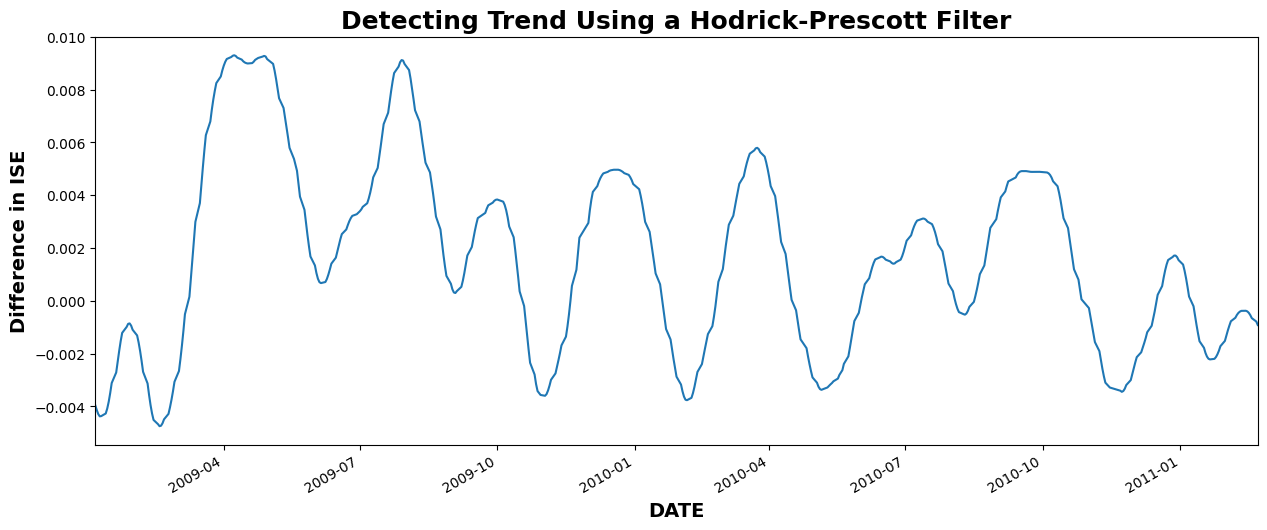

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
df = pd.read_excel(r'istambul_stock_exchange.xlsx',index_col=0,parse_dates=True)
EXINUS_cycle,EXINUS_trend = hpfilter(df['ISE'], lamb=1600)
EXINUS_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Detecting Trend Using a Hodrick-Prescott Filter', fontsize=18, fontweight='bold')
plt.xlabel('DATE', fontsize=14, fontweight='bold')
plt.ylabel('Difference in ISE', fontsize=14, fontweight='bold')


The graph shows how ISE has varied over some time, crossing zero from above and below. The main points that can be drawn from the graph are:

* How often the line moves above and below the baseline indicates short-term variations.
* The line comes back close to the baseline once in a while, which indicates no long-term upward or downward trend.
* The crests and troughs do not show any regularity, thus pointing out that the changes in the variable measured are irregular.

**Detrending a Time Series:**

* Pandas differencing
* SciPy signal
* HP filter









/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


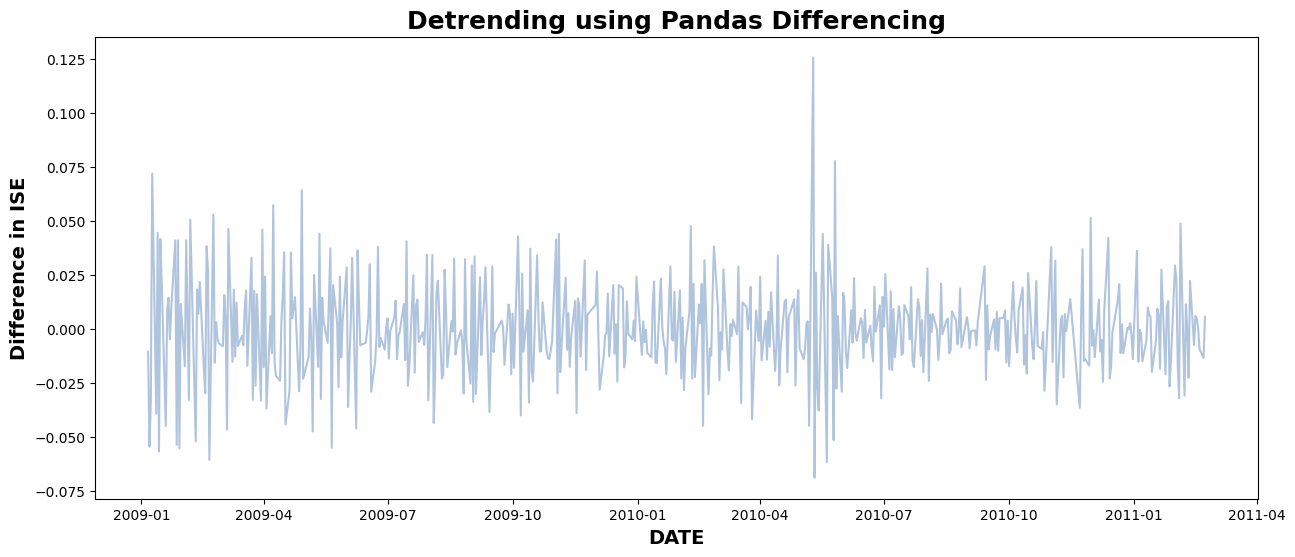

In [ ]:
series = pd.read_excel(r'istambul_stock_exchange.xlsx',index_col=0,parse_dates=True)
X = series['ISE'].values
diff = list()
for i in range(1, len(X)):
  value = X[i] - X[i - 1]
  diff.append(value)

plt.figure(figsize=(15, 6))
plt.plot(diff_scratch, color='lightsteelblue', linestyle='-', linewidth=1.5)
plt.title('Detrending using Pandas Differencing', fontsize=18, fontweight='bold')
plt.xlabel('DATE', fontsize=14, fontweight='bold')
plt.ylabel('Difference in ISE', fontsize=14, fontweight='bold')
plt.show()

It simply shows monetary value fluctuation across time after trends or seasonal effects are removed. Key takeaways:

* The data fluctuates around a mean of zero, indicating that there is really no clear long-term upward or downward trend.
* These values will, in the short term, display irregular fluctuations, thus being indicative of random noise.

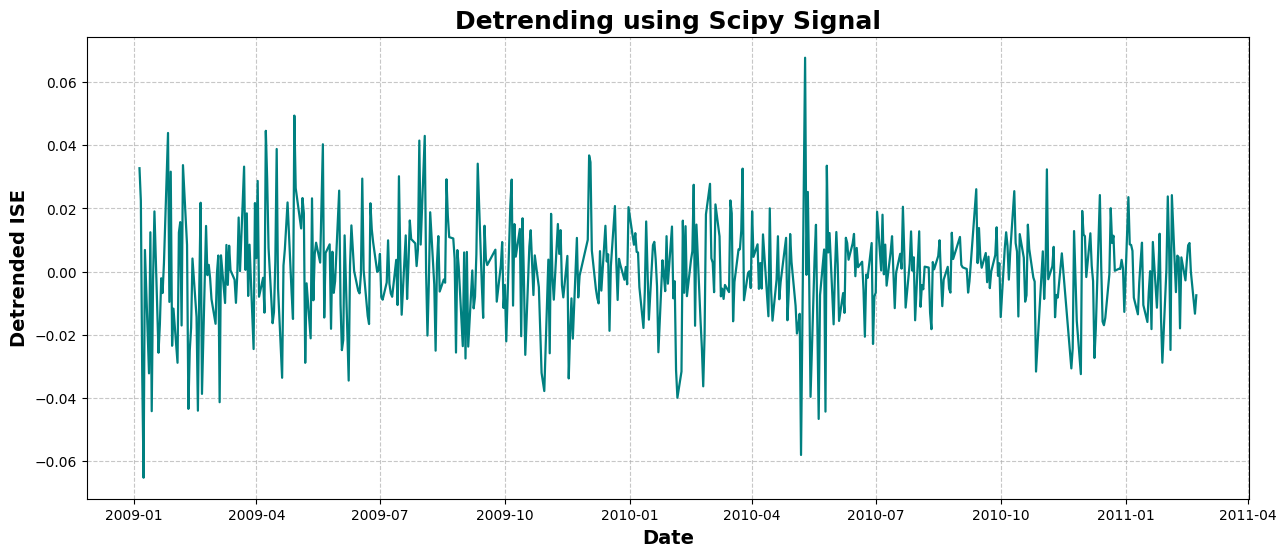

In [ ]:
detrended = signal.detrend(df.ISED.values)
plt.figure(figsize=(15, 6))
plt.plot(prices.index, detrended_signal, color='teal', linestyle='-', linewidth=1.6)
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Detrended ISE', fontsize=14, fontweight='bold')
plt.title('Detrending using Scipy Signal', fontsize=18, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

The data spans from January 2003 to April 2011, as indicated on the x-axis.

The y-axis represents the detrended standardized errors. These values show how the data fluctuates around the mean after the trend has been removed.



/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


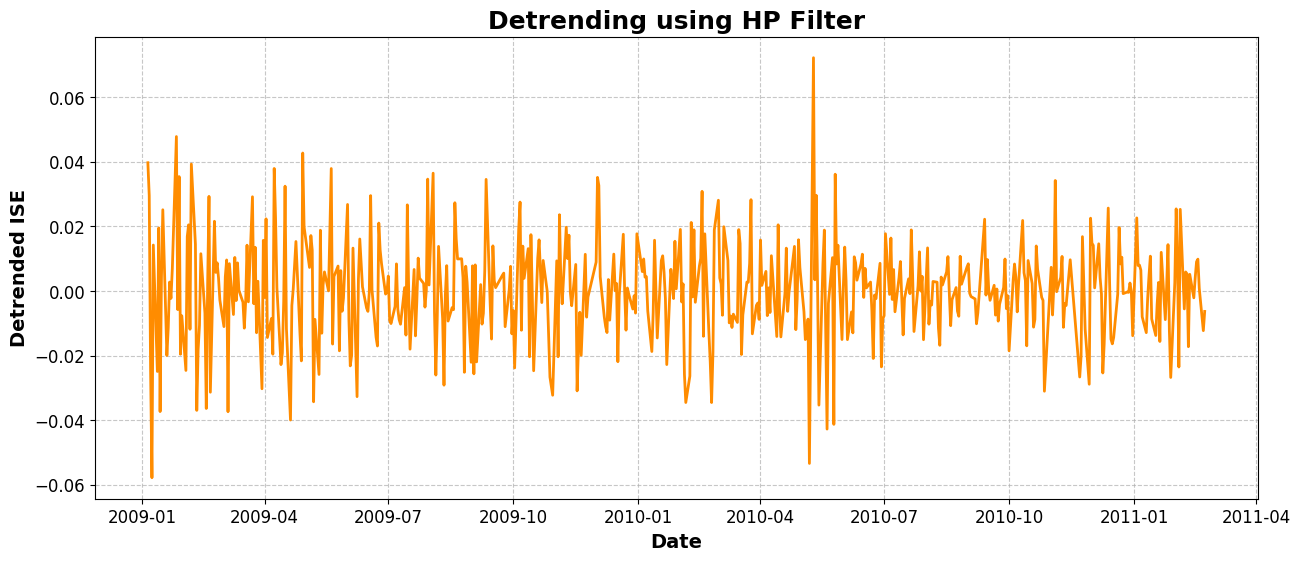

In [ ]:
df = pd.read_excel(r'istambul_stock_exchange.xlsx', index_col=0, parse_dates=True)
ISED_cycle, EXINUS_trend = hpfilter(df['ISE'], lamb=1600)
df['trend'] = EXINUS_trend
detrended = df['ISE'] - df['trend']
plt.figure(figsize=(15, 6))
plt.plot(detrended, color='darkorange', linestyle='-', linewidth=2)
plt.title('Detrending using HP Filter', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Detrended ISE', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

It is used to separate cyclical components and trend component

the graph shows that previous peaks align with the trend.

This indicates that the data remains stationary with significant variation between entries.